In [1]:
# Example Parameters
# model_dir = "/Users/albertstanley/Code/quonlab/tests/out/test5_out"
# gpu = 0
# memfrac_gpu = 0.45
# in_memory = True
# num_workers = 8

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import rloops
from rloops.utils import load_from_file
from rloops.make_pickles import make_pickles, calc_peak_metrics
from rloops.bpnet_api import get_valid_chrs

# Setup 
from pathlib import Path
model_dir = Path(model_dir)
valid_chrs = get_valid_chrs(model_dir)

# Create pickles and calculate metrics
make_pickles(model_dir, "valid")
calc_peak_metrics(model_dir)
print()

Using TensorFlow backend.


2021-10-09 16:28:40,891 [WARNING] From /Users/albertstanley/miniconda3/envs/bpnet/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

2021-10-09 16:28:41,669 [INFO] Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-10-09 16:28:41,670 [INFO] NumExpr defaulting to 8 threads.
TF-MoDISco is using the TensorFlow backend.


2021-10-09 16:28:42,785 [WARNING] From /Users/albertstanley/miniconda3/envs/bpnet/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



2021-10-09 16:28:42,847 [WARNING] From /Users/albertstanley/miniconda3/envs/bpnet/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



2021-10-09 16:28:42,848 [WARNING] From /Users/albertstanley/miniconda3/envs/bpnet/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.



2021-10-09 16:28:42,867 [WARNING] From /Users/albertstanley/miniconda3/envs/bpnet/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



2021-10-09 16:28:43,125 [WARNING] From /Users/albertstanley/miniconda3/envs/bpnet/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



2021-10-09 16:28:44,035 [WARNING] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


2021-10-09 16:28:44,036 [WARNING] From /Users/albertstanley/miniconda3/envs/bpnet/lib/python3.6/site-packages/bpnet/losses.py:27: Multinomial.__init__ (from tensorflow.python.ops.distributions.multinomial) is deprecated and will be removed after 2019-01-01.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


2021-10-09 16:28:44,043 [WARNING] From /Users/albertstanley/miniconda3/envs/bpnet/lib/python3.6/site-packages/tensorflow/python/ops/distributions/multinomial.py:217: Distribution.__init__ (from tensorflow.python.ops.distributions.distribution) is deprecated and will be removed after 2019-01-01.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Instructions for updating:
Use `tf.cast` instead.


2021-10-09 16:28:44,048 [WARNING] From /Users/albertstanley/miniconda3/envs/bpnet/lib/python3.6/site-packages/bpnet/losses.py:30: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


Calculating on chr2


  0%|          | 0/1 [00:00<?, ?it/s]

Input Dimensions:  (10000, 3)


100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


In [3]:
# Code for plots
def normalize_arr(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def probab_arr(x):
    # Change x to a probability distribution
    x = x + 0.01
    return  x / np.sum(x)

def to_neg(track):
    """Use the negative sign for reads on the reverse strand
    """
    track = track.copy()
    track = - track
    return track


def plot_tracks(true_profile, pred_profile,title="Title"):
    
    pos_track_true = true_profile[:,0]
    pos_track_pred = pred_profile[:,0]
    
    prob_track_true = probab_arr(pos_track_true)
    prob_track_pred = probab_arr(pos_track_pred)
    
    # description of track counts
    suptitle = """
    Actual Counts (+): {}
    Predicted Counts (+): {}
    """.format(int(sum(pos_track_true)),int(sum(pos_track_pred)))
    plt.title(title)
    
    
    pos_track_true = normalize_arr(pos_track_true)
    pos_track_pred = normalize_arr(pos_track_pred)
    
    
    # For plotting switch negative 
    prob_track_true = to_neg(prob_track_true)
    prob_track_pred = to_neg(prob_track_pred)
    
    # Plot the tracks
    plt.plot(pos_track_true, color='#1f77b4') # blue
    true_line = plt.plot(prob_track_true, color='#1f77b4')[0] # blue
    true_line.set_label("True")
    
    
    plt.plot(pos_track_pred, color='#ff7f0e') # orange
    pred_line = plt.plot(prob_track_pred, color='#ff7f0e')[0] # orange
    pred_line.set_label("Pred")
    
    plt.legend()
    plt.show()

def plot_tracks_sep(true_profile, pred_profile,title="Title"):
    
    pos_track_true = true_profile[:,0]
    pos_track_pred = pred_profile[:,0]
    
    prob_track_true = probab_arr(pos_track_true)
    prob_track_pred = probab_arr(pos_track_pred)
    
    # description of track counts
    suptitle = """
    Actual Counts (+): {}
    Predicted Counts (+): {}
    """.format(int(sum(pos_track_true)),int(sum(pos_track_pred)))
    plt.title(title)
    
    # pos_track_true = normalize_arr(pos_track_true)
    # pos_track_pred = normalize_arr(pos_track_pred)
    
    # print("Scaled 0-1")
    # # Plot the tracks
    # true_line = plt.plot(pos_track_true, color='#1f77b4')[0] # blue
    # true_line.set_label("True scaled zero to 1")
    # pred_line = plt.plot(pos_track_pred, color='#ff7f0e')[0] # orange
    # pred_line.set_label("Pred scaled zero to 1")
    # plt.show()
    
    # print("Scaled as Probability Distribution")
    true_line = plt.plot(prob_track_true, color='#1f77b4')[0] # blue
    true_line.set_label("True")
    pred_line = plt.plot(prob_track_pred, color='#ff7f0e')[0] # orange
    pred_line.set_label("Pred")
    plt.xlabel("Base Pair Index")
    plt.ylabel("Probability of Read at Index")
    
    plt.legend()
    plt.show()

def plot_top_peaks(chrom,ranker, num_top=5,plot_track_func=plot_tracks):
    """
    ranker: arr where arr[i] indicates rank of element i, lower rank means better
    num_top: how many of top peaks to plot for each category
    """
    
    # Based on divergence
    inp = load_from_file(model_dir / ("input_" + chrom))
    pred = load_from_file(model_dir / ("pred_" + chrom))
    
    
    
    for index in np.argsort(ranker)[0:num_top]:
        true_arr = inp['targets']['rep1/profile'][index]
        pred_arr = pred['rep1/profile'][index] * np.expm1(pred['rep1/counts'][index])
        
        display = (
            f'{chrom}: Peak {index}\n'
            f'Actual Counts (+): {int(np.sum(true_arr,axis=0)[0])}\n'
            # f'Actual Counts (-): {int(np.sum(true_arr,axis=0)[1])}\n'
            f'Predicted Counts (+): {int(np.sum(pred_arr,axis=0)[0])}\n' 
            # f'Predicted Counts (-): {int(np.sum(pred_arr,axis=0)[1])}\n'
        )
        
        plot_track_func(true_arr,
                    pred_arr,
                    title=display)

In [4]:
# Plot loss curves
import pandas as pd
import matplotlib.pyplot as plt
def plot_loss():
    history = pd.read_csv(model_dir / "history.csv")
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor('white')
    ax.plot(history.index, history['loss'],label="Total Training Loss")
    ax.plot(history.index, history['val_loss'],label="Total Validation Loss")
    ax.set_ylim([0,70000])
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Total Loss")
    ax.legend()
    
    return history

,epoch,loss,rep1/counts_loss,rep1/profile_loss,val_loss,val_rep1/counts_loss,val_rep1/profile_loss
0,0,103666.972656,87.664539,103579.308594,18524.992188,68.073196,18456.919922
1,1,102416.800781,94.442039,102322.359375,25305.837891,77.522247,25228.316406


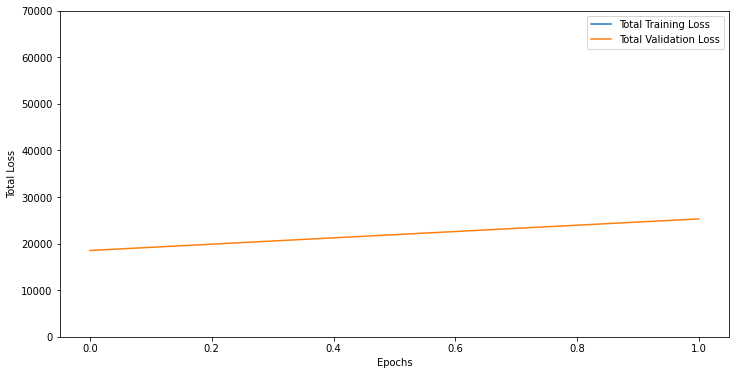

In [5]:
# Load metrics
losses = load_from_file(model_dir / "losses_dict")
divergences = load_from_file(model_dir / "divergences_dict")
mse_prob_scores = load_from_file(model_dir / "MSE_prob_dict")

# Plot Loss
plot_loss()

# Top Peaks

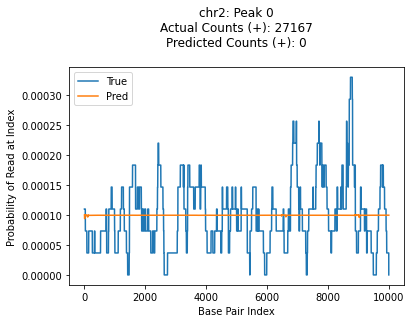

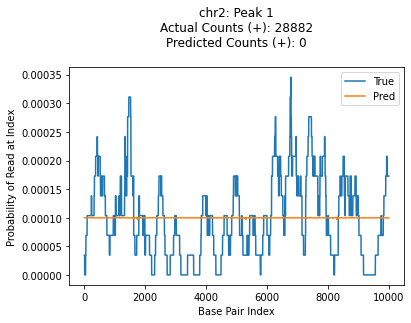

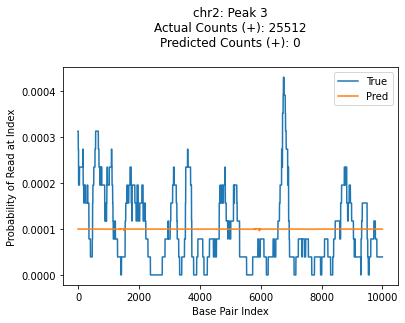

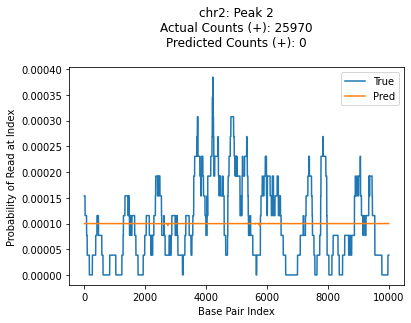

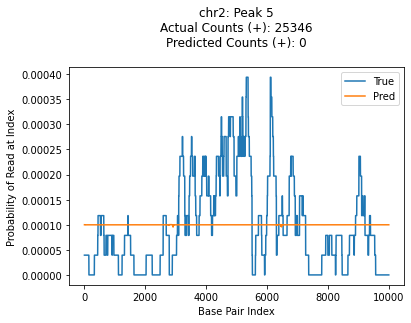

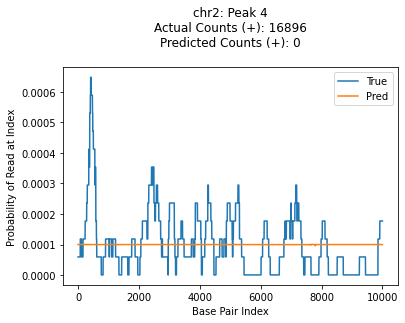

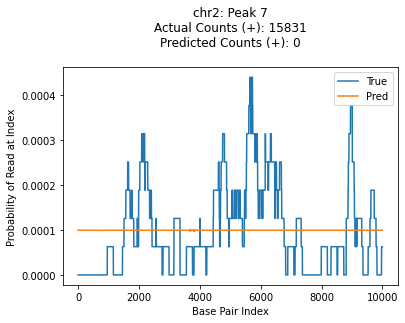

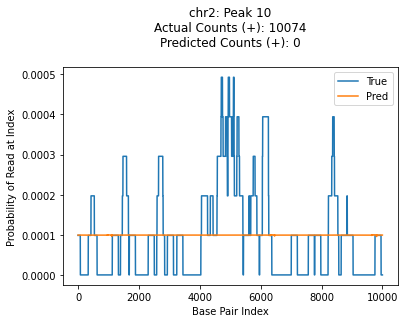

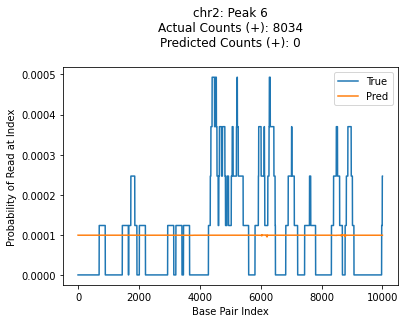

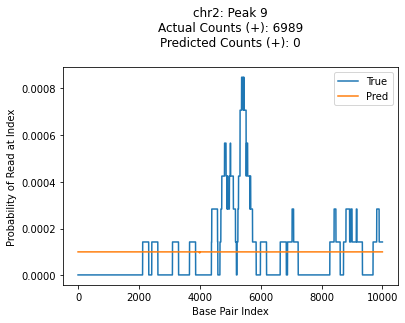

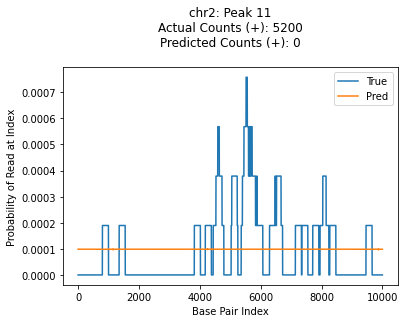

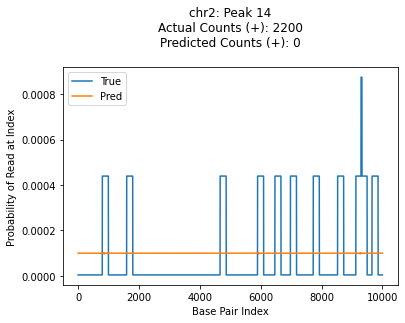

In [6]:
# Top Peaks 
plot_top_peaks(valid_chrs[0], 
               divergences[valid_chrs[0]]["+strand_forwardKL"], 
               num_top=12,
              plot_track_func=plot_tracks_sep)

# Random Peaks

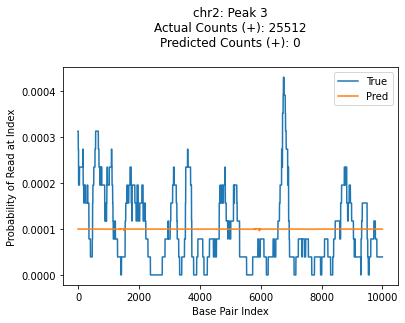

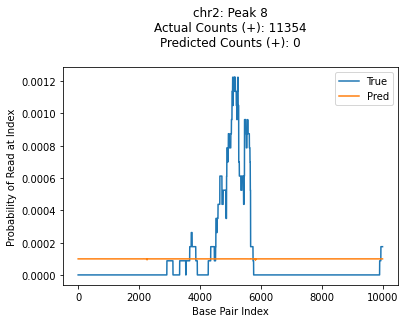

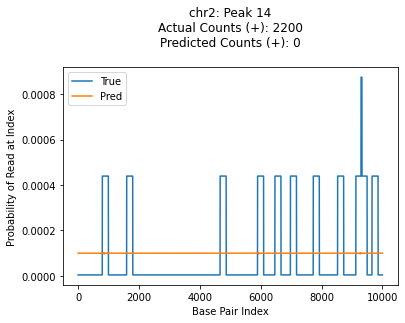

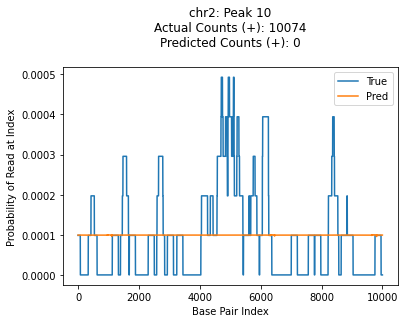

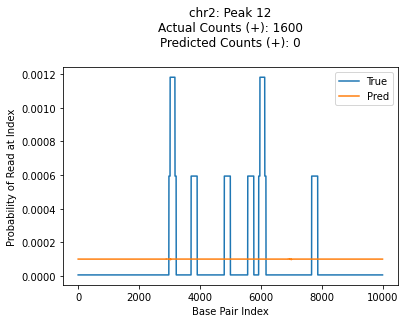

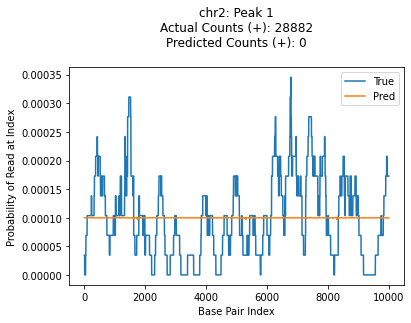

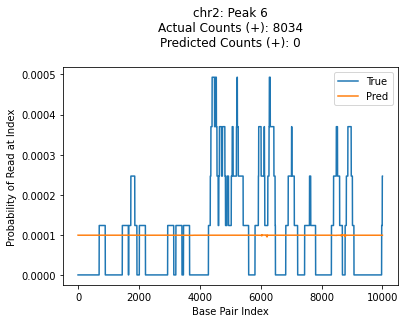

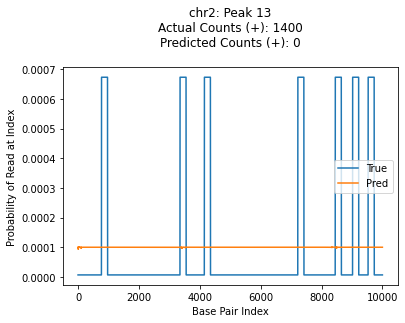

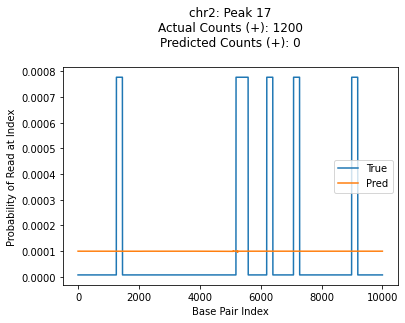

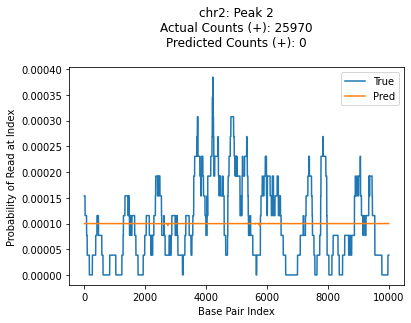

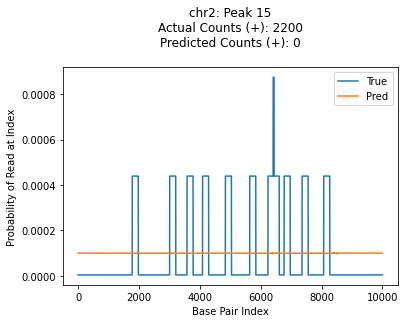

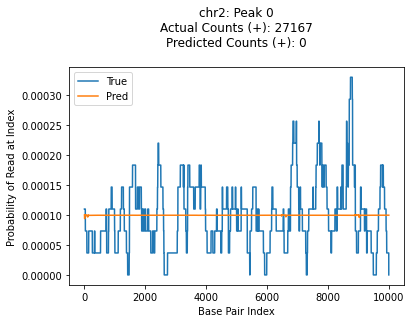

In [7]:
# Random Peaks
plot_top_peaks(valid_chrs[0], 
               np.random.rand(divergences[valid_chrs[0]]["+strand_forwardKL"].shape[0]), 
               num_top=12,
              plot_track_func=plot_tracks_sep)